<a href="https://colab.research.google.com/github/inashellshelley/Predicting-Customer-Churn-in-a-Telecommunications-Company/blob/main/SpeakX02_PredictingCustomerChurn_Telecommunications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [3]:
df.shape

(7043, 21)

In [4]:
df.size

147903

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
null_values = df.isnull().sum()
print("Values missing in each column: ", null_values)

Values missing in each column:  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [10]:
missing_values = df.isnull().sum()
print("Missing values after handling data: ", missing_values)

Missing values after handling data:  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

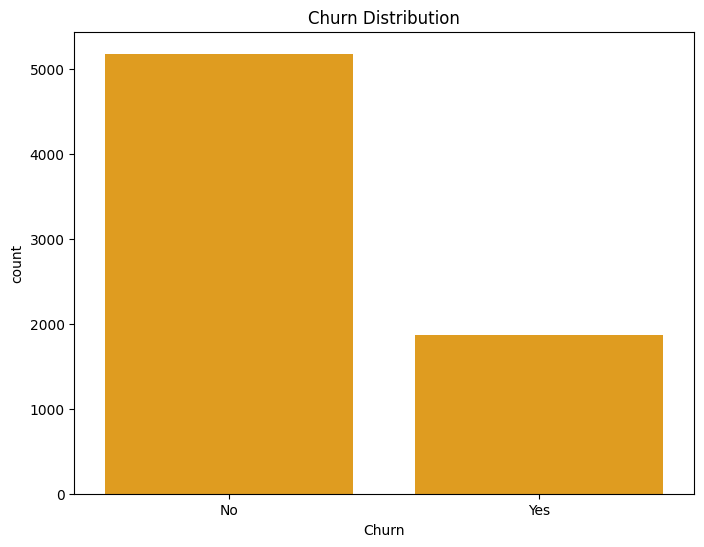

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, color='orange')
plt.title('Churn Distribution')
plt.show()

In [14]:
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("Churn Percentage: ", churn_percent)

Churn Percentage:  Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [15]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

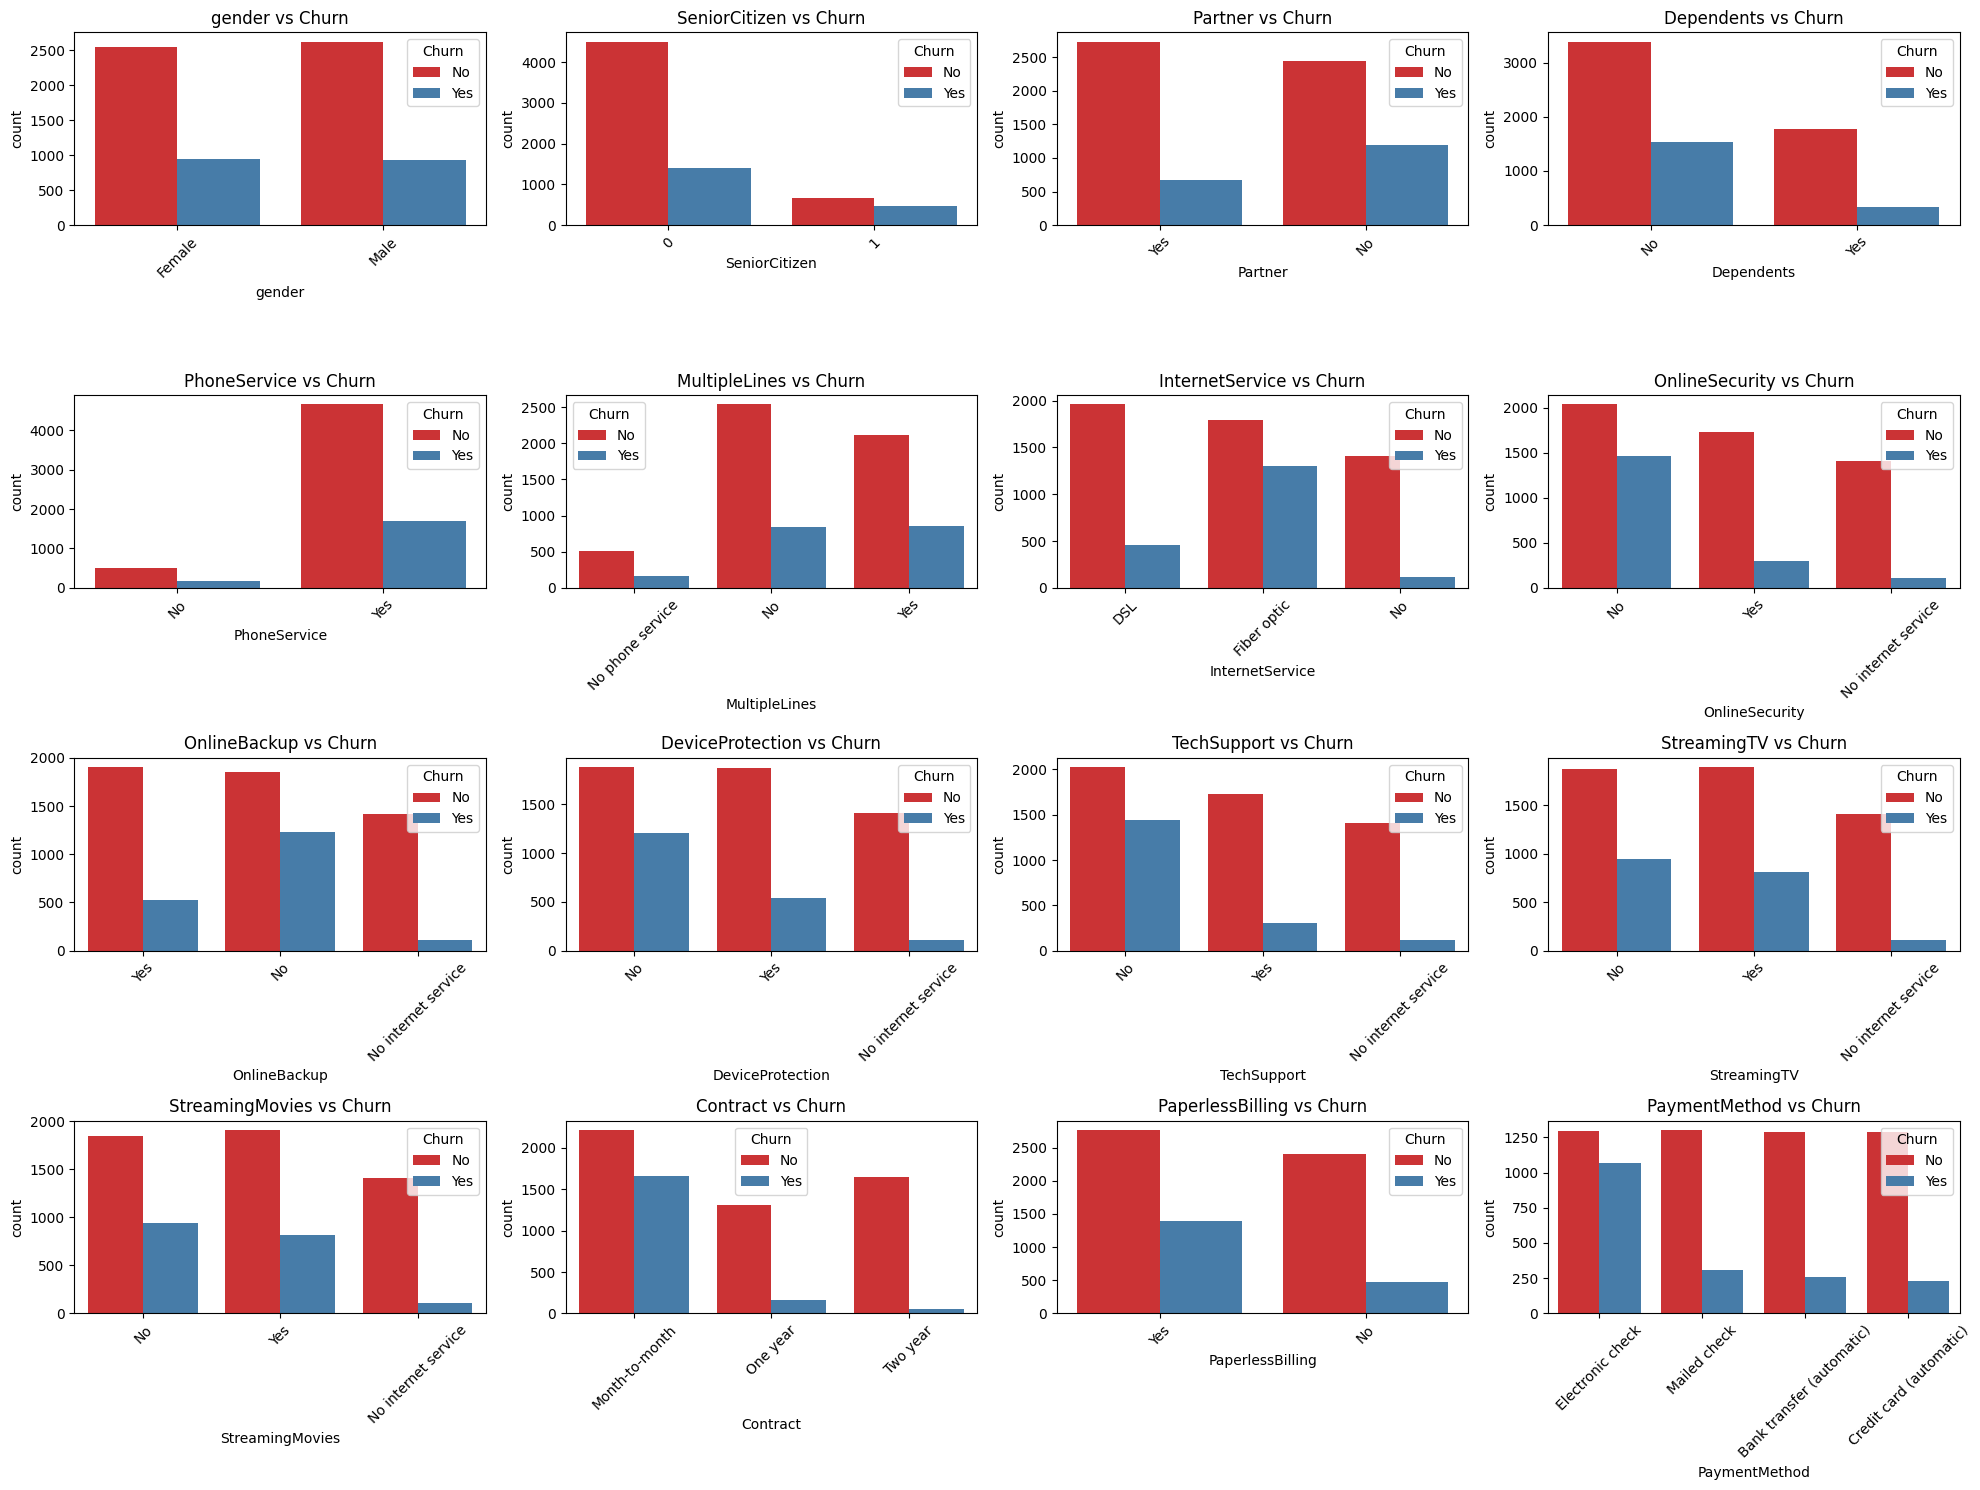

In [16]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=feature, hue='Churn', palette='Set1')
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

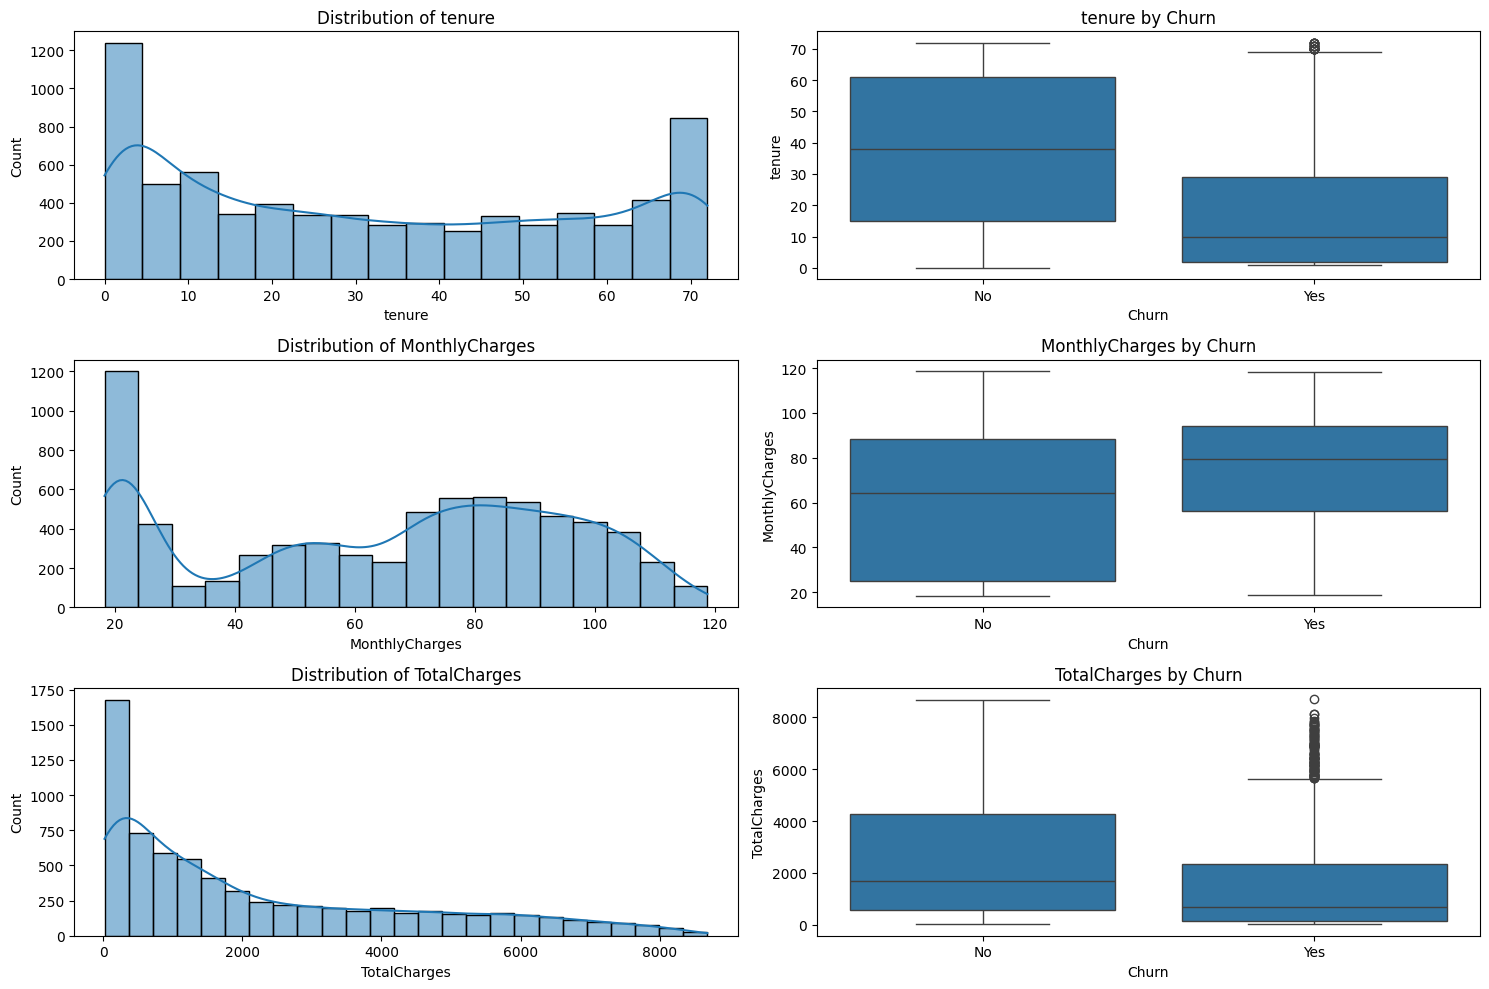

In [17]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i*2-1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(3, 2, i*2)
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

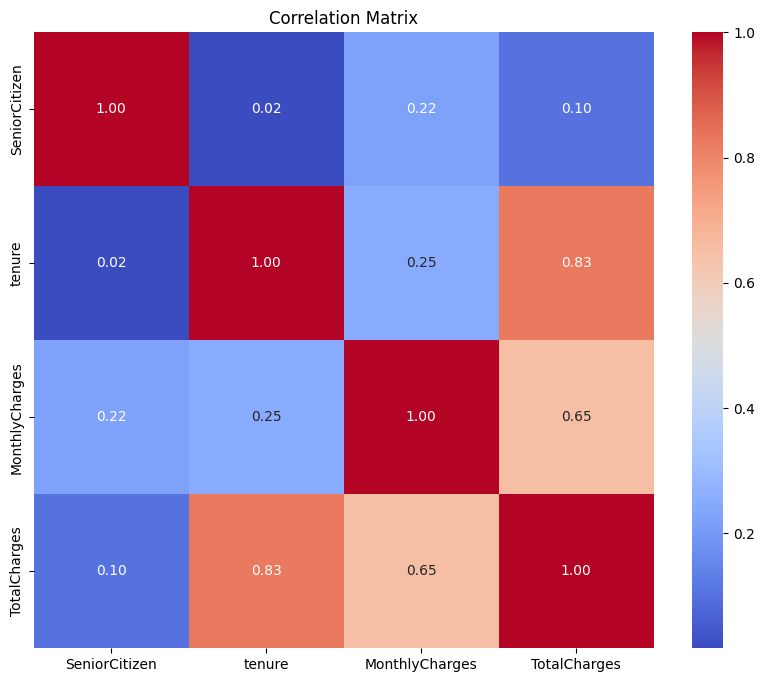

In [18]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
col_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod', 'Churn']

In [20]:
df_encoded = pd.get_dummies(df, columns=col_encode, drop_first=True)
print(df_encoded.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0       1           29.85         29.85   
1  5575-GNVDE              0      34           56.95       1889.50   
2  3668-QPYBK              0       2           53.85        108.15   
3  7795-CFOCW              0      45           42.30       1840.75   
4  9237-HQITU              0       2           70.70        151.65   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         True        False           False              True   
3         True        False           False             False   
4        False        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_Yes  \
0                            True  ...            False   
1                           False  ...            False   
2          

In [21]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


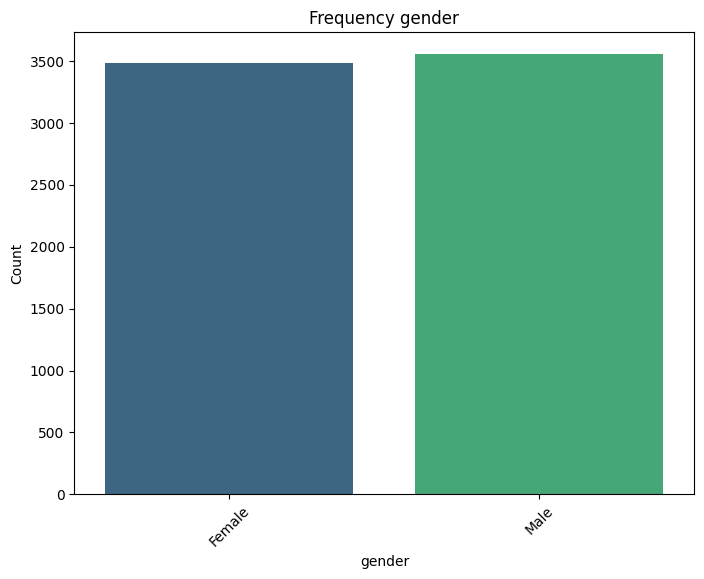

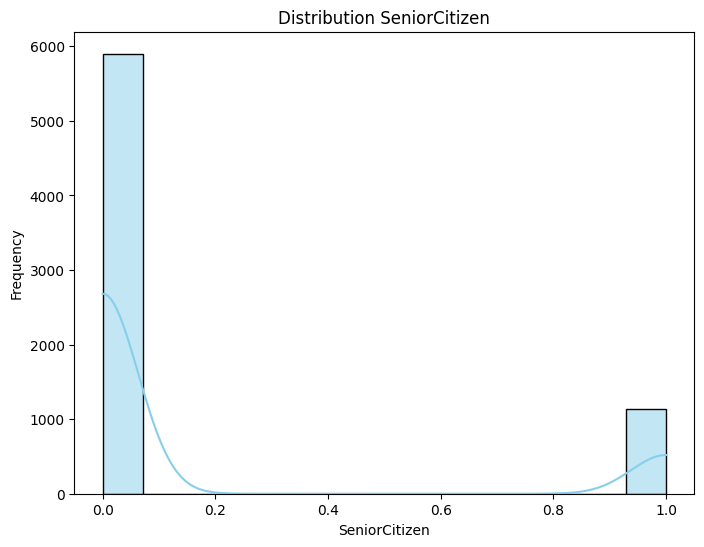

<ipython-input-22-013ae254956b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='coolwarm')


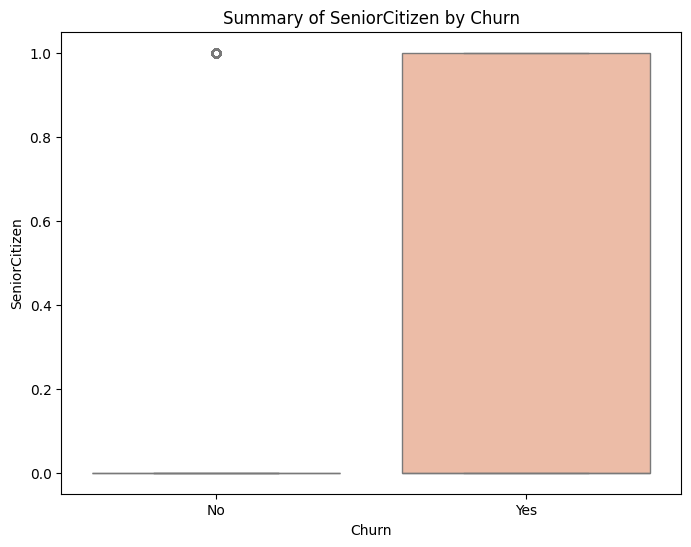

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


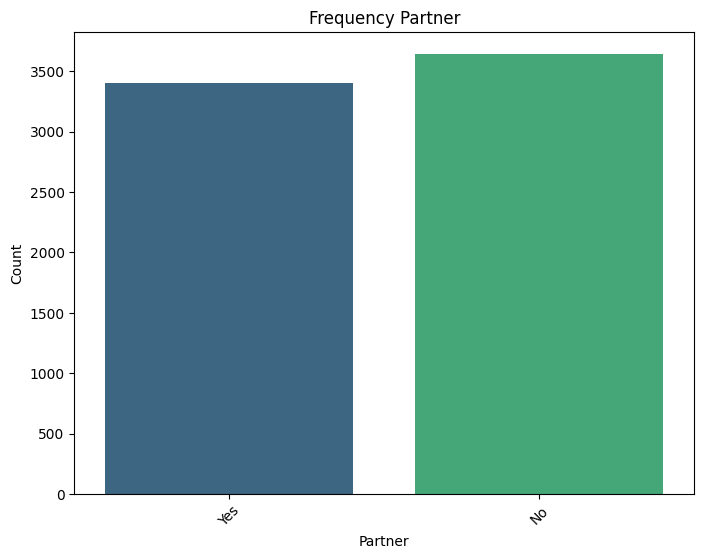

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


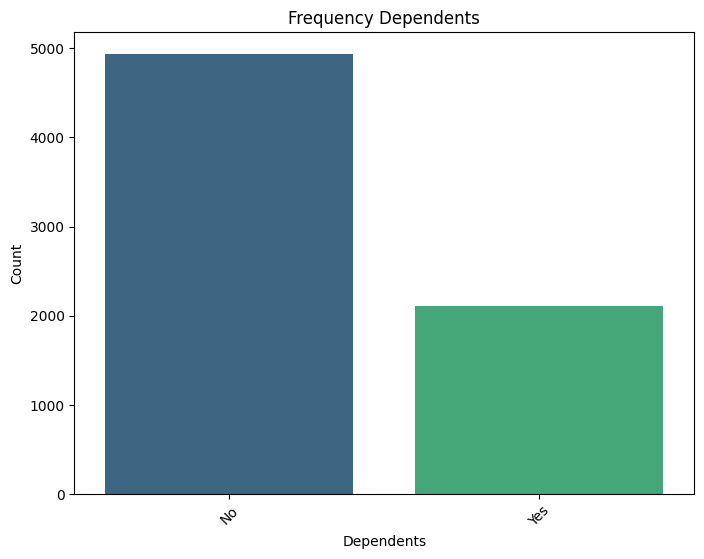

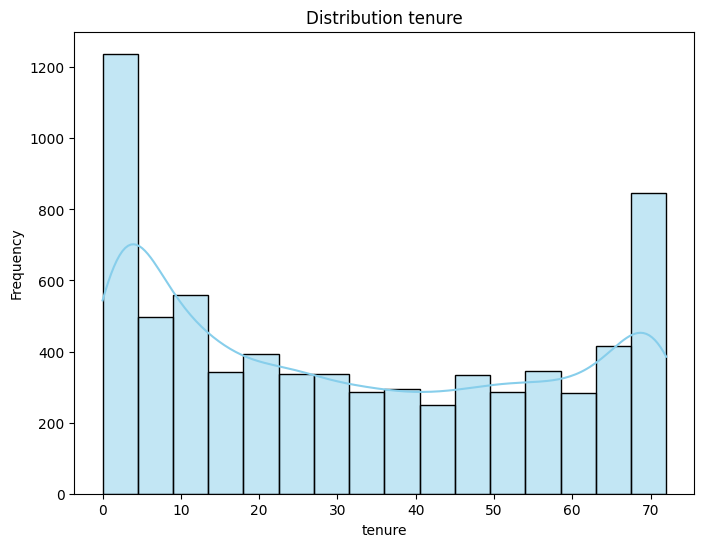

<ipython-input-22-013ae254956b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='coolwarm')


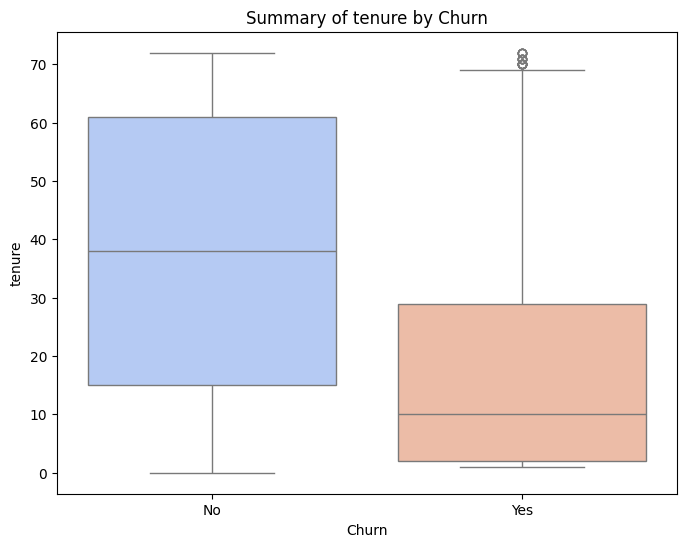

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


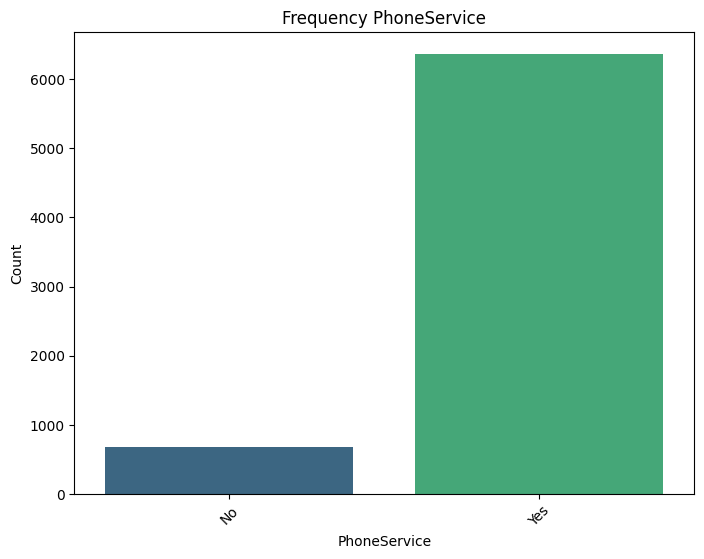

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


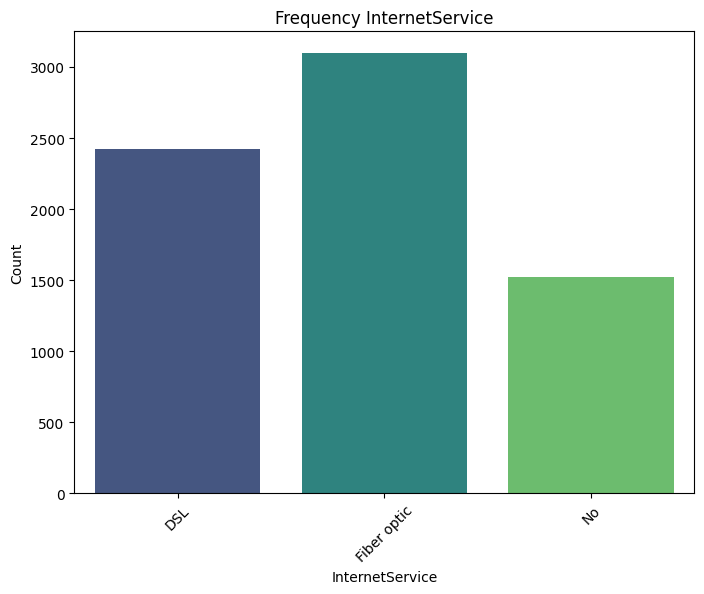

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


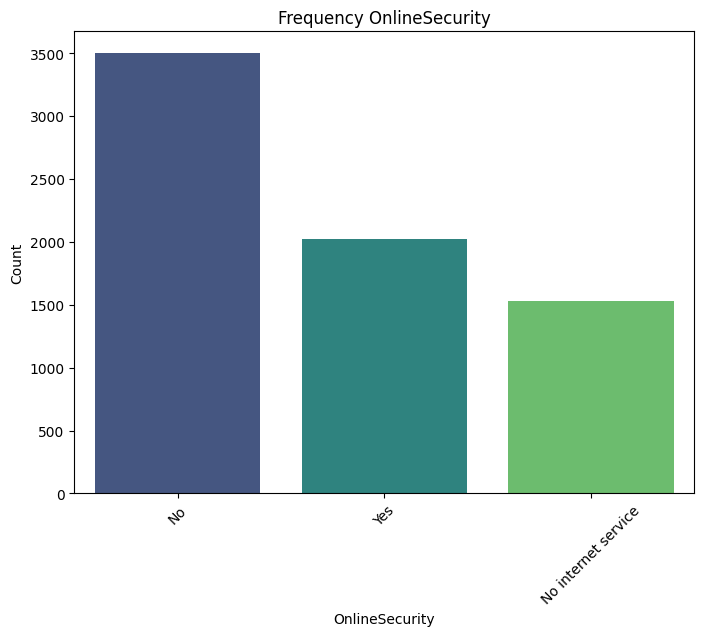

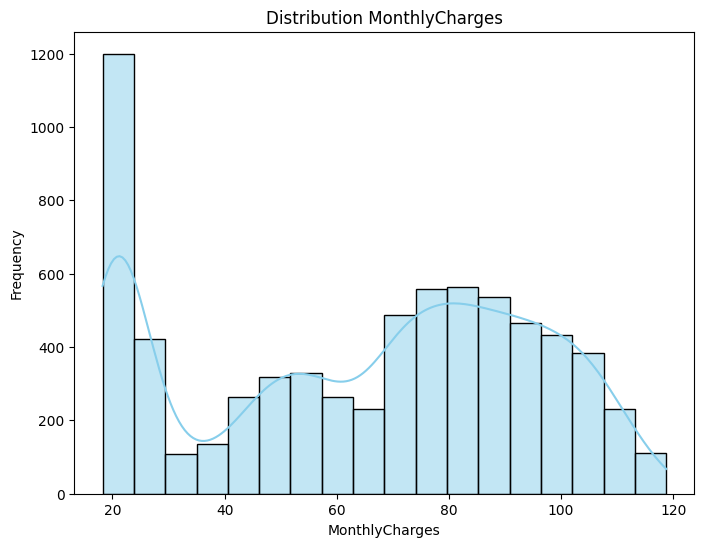

<ipython-input-22-013ae254956b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='coolwarm')


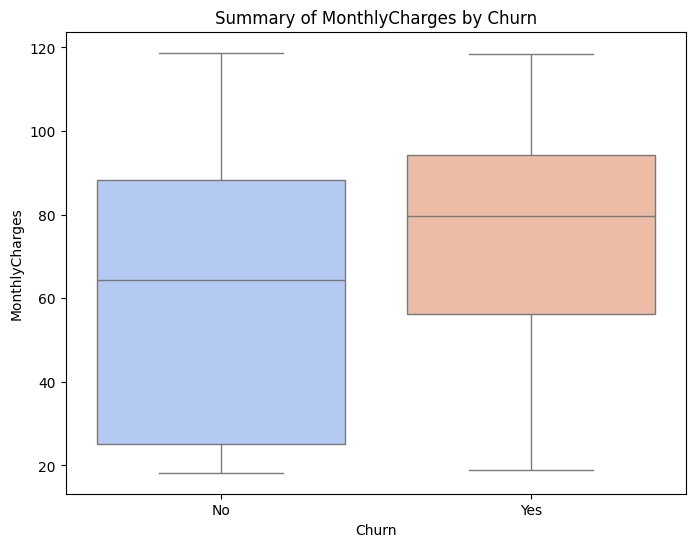

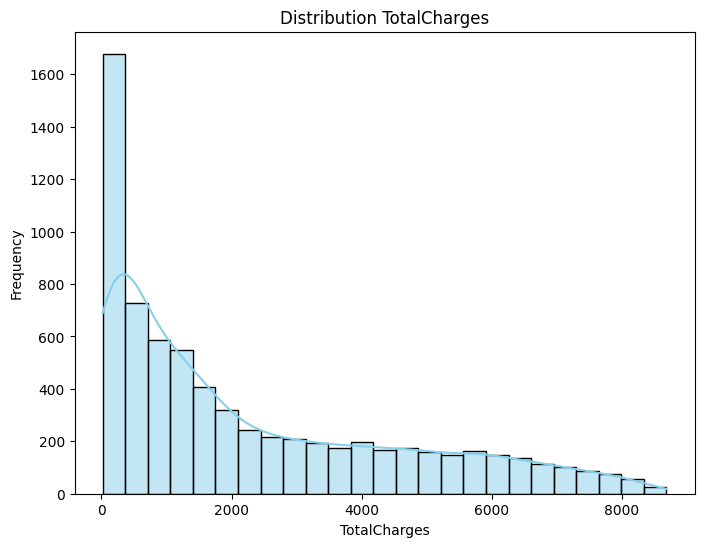

<ipython-input-22-013ae254956b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='coolwarm')


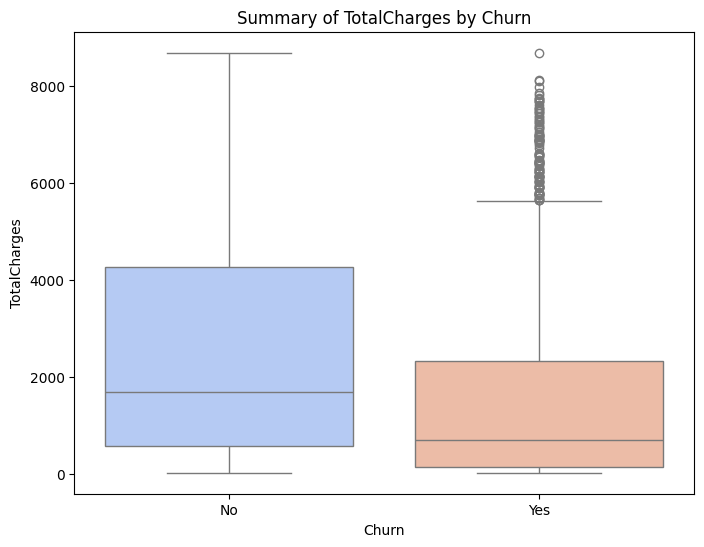

<ipython-input-22-013ae254956b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


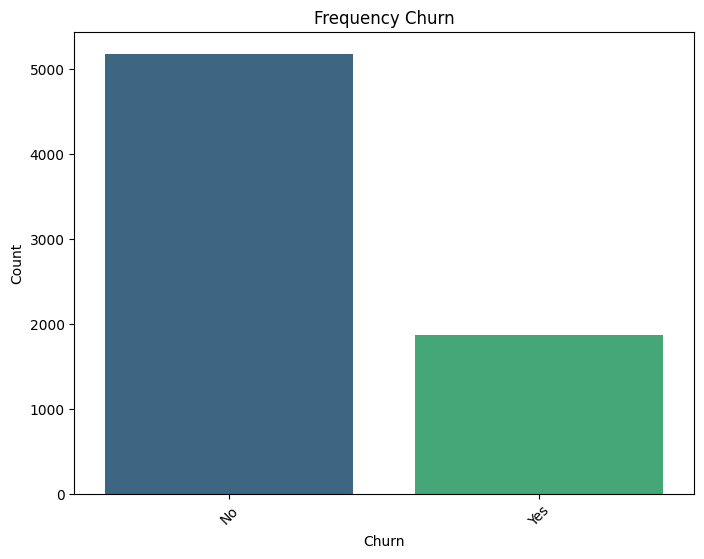

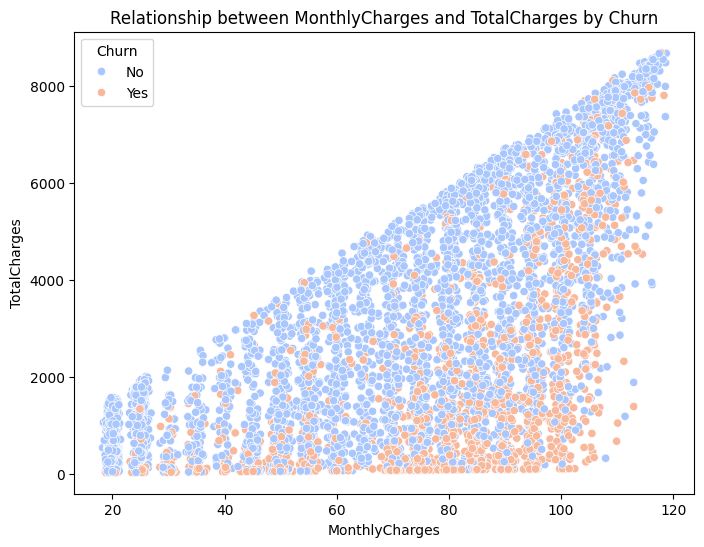

In [22]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'MonthlyCharges', 'TotalCharges', 'Churn']

for feature in features:
    if feature not in df.columns:
        print(f"Warning: '{feature}' column not found in the DataFrame.")
        continue

    if df[feature].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, data=df, palette='viridis')
        plt.title(f'Frequency {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[feature], kde=True, color='skyblue')
        plt.title(f'Distribution {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

        if feature != 'Churn':
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='Churn', y=feature, data=df, palette='coolwarm')
            plt.title(f'Summary of {feature} by Churn')
            plt.xlabel('Churn')
            plt.ylabel(feature)
            plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, palette='coolwarm')
plt.title(f'Relationship between MonthlyCharges and TotalCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.drop('customerID', axis=1)
X_test = X_test.drop('customerID', axis=1)
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
rf = grid_search_rf.best_estimator_

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
knn = grid_search_knn.best_estimator_

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
dt = grid_search_dt.best_estimator_

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [33]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    return accuracy, precision, recall, f1

In [34]:
print("Logistic Regression")
accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(lr, X_test, y_test)

Logistic Regression
Accuracy: 0.8211, Precision: 0.6862, Recall: 0.5979, F1-score: 0.6390


In [35]:
print("Random Forest")
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(rf, X_test, y_test)

Random Forest
Accuracy: 0.8119, Precision: 0.6957, Recall: 0.5147, F1-score: 0.5917


In [36]:
print("K-Nearest Neighbors")
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn, X_test, y_test)

K-Nearest Neighbors
Accuracy: 0.7977, Precision: 0.6287, Recall: 0.5764, F1-score: 0.6014


In [37]:
print("Decision Tree")
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(dt, X_test, y_test)

Decision Tree
Accuracy: 0.8062, Precision: 0.7049, Recall: 0.4611, F1-score: 0.5575


In [38]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('logReg', lr),
        ('random_forest', rf),
        ('knn', knn),
        ('decision_tree', dt)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logReg', LogisticRegression(max_iter=1000)),
                             ('random_forest',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11, p=1)),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42))],
                 voting='soft')

In [39]:
print("Voting Classifier")
accuracy_voting, precision_voting, recall_voting, f1_voting = evaluate_model(voting_clf, X_test, y_test)

Voting Classifier
Accuracy: 0.8155, Precision: 0.6877, Recall: 0.5550, F1-score: 0.6142


In [40]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors','Decision Tree', 'Voting Classifier'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_dt, accuracy_voting],
    'Precision': [precision_lr, precision_rf, precision_knn, precision_dt, precision_voting],
    'Recall': [recall_lr, recall_rf, recall_knn, recall_dt, recall_voting],
    'F1-score': [f1_lr, f1_rf, f1_knn, f1_dt, f1_voting]
}

In [41]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.821150   0.686154  0.597855  0.638968
1        Random Forest  0.811923   0.695652  0.514745  0.591680
2  K-Nearest Neighbors  0.797729   0.628655  0.576408  0.601399
3        Decision Tree  0.806246   0.704918  0.461126  0.557536
4    Voting Classifier  0.815472   0.687708  0.554960  0.614243


<ipython-input-42-e28b686e6bc9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(models, rotation=45, ha='right')


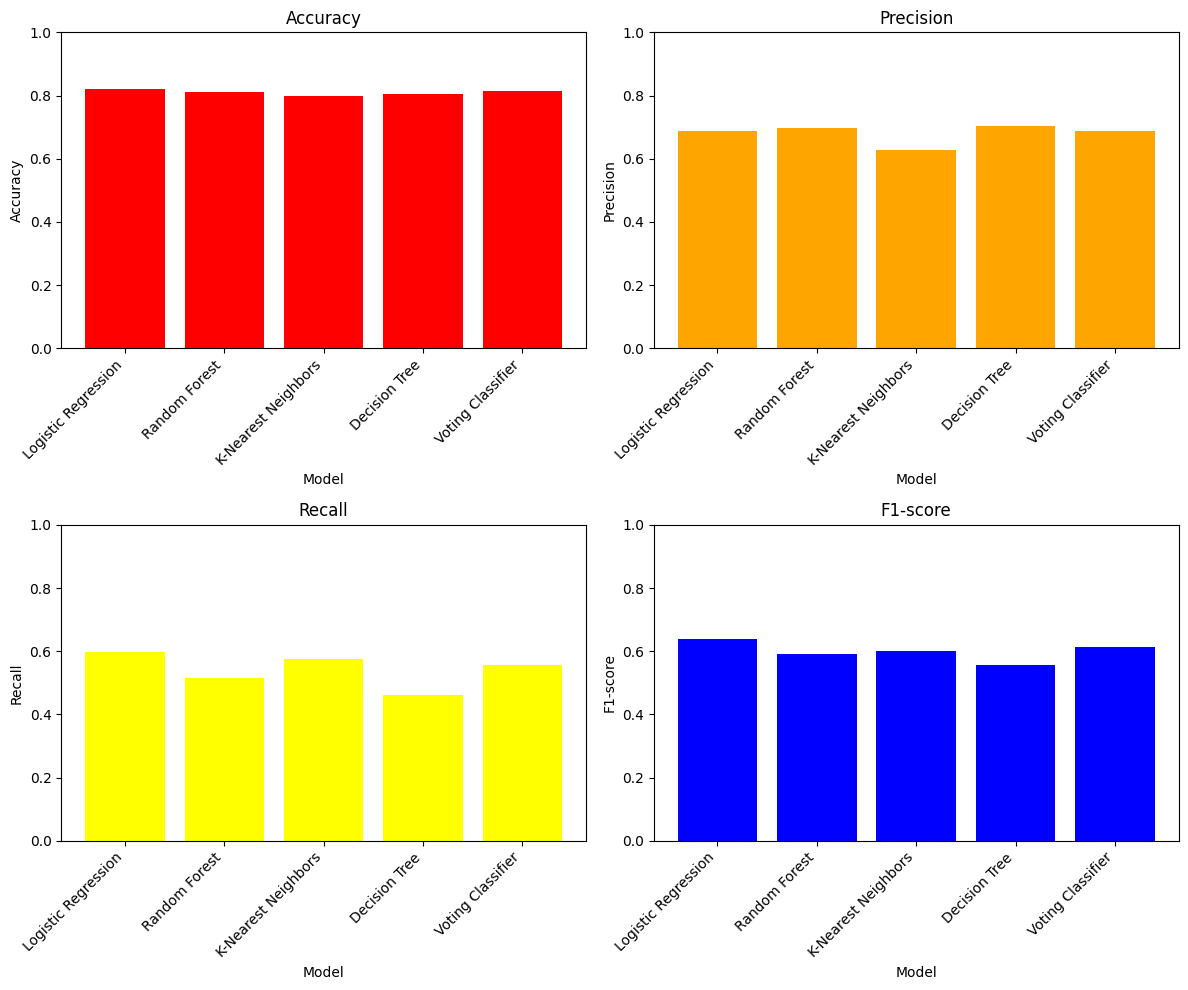

In [42]:
models = results_df['Model']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['red', 'orange', 'yellow', 'blue']
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    axs[row, col].bar(models, results_df[metric], color=colors[i])
    axs[row, col].set_title(metric)
    axs[row, col].set_ylabel(metric)
    axs[row, col].set_xlabel('Model')
    axs[row, col].set_xticklabels(models, rotation=45, ha='right')
    axs[row, col].set_ylim(0, 1)

plt.tight_layout()
plt.show()